<center><h1>Quora Question Pairs</h1></center>


In [304]:
#pip install -U dataprep

In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.corpus import stopwords
# import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import	re	#	Regular	expression	library
import	string
from nltk.stem import WordNetLemmatizer
from	nltk.tokenize	import	word_tokenize
import gensim
from gensim.parsing.preprocessing import remove_stopwords 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

from token import *
from	nltk.stem.lancaster	import	LancasterStemmer	
from textblob import TextBlob
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, roc_curve,roc_auc_score
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc
import re
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords
import	re	#	Regular	expression	library
import	string
from nltk.stem import WordNetLemmatizer
from	nltk.tokenize	import	word_tokenize
import gensim
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.datasets import make_classification, load_breast_cancer
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

from token import *
from	nltk.stem.lancaster	import	LancasterStemmer	
from textblob import TextBlob
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\96650\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\96650\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [306]:
df = pd.read_csv('train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


# Exploratory data analysis

In [307]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [308]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Missing value '])

cm = sns.light_palette("red", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing value
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [309]:
df=df.dropna()  

In [310]:
missing = pd.DataFrame(df.isnull().sum(), columns=['Missing value '])

cm = sns.light_palette("pink", as_cmap=True)
missing.style.background_gradient(cmap=cm)

,Missing value
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


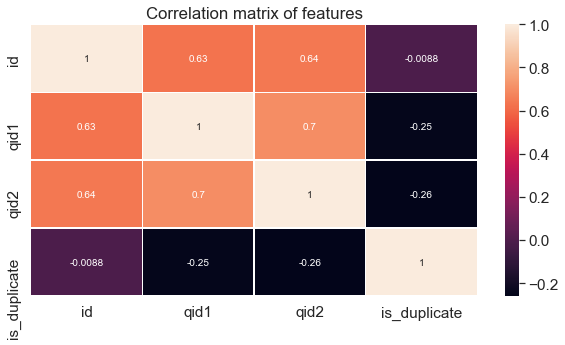

In [311]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(corr,annot=True, cmap = "rocket", linewidth = 0.30)
plt.title("Correlation matrix of features")
plt.show()

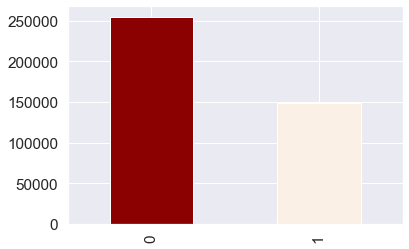

In [312]:
color =['darkred', 'linen']
df["is_duplicate"].value_counts().plot(kind='bar',color=color)
plt.show()

Number of question pairs:     404287
Number of duplicates:         149263
Number of non-duplicates:     255024


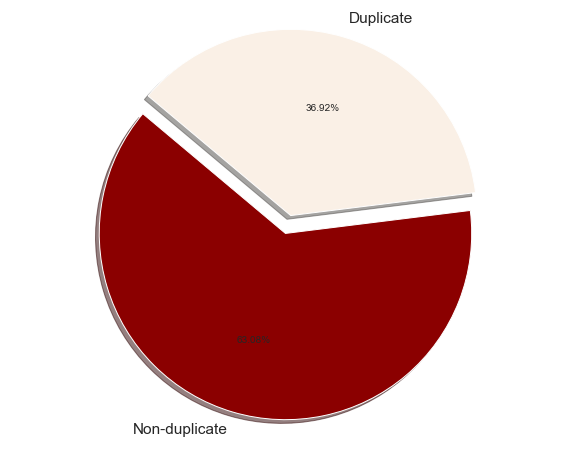

In [313]:
print('Number of question pairs: '.ljust(30) + str(len(df)))
print('Number of duplicates: '.ljust(30) + str(len(df[df.is_duplicate == 1])))
print('Number of non-duplicates: '.ljust(30) + str(len(df[df.is_duplicate == 0])))

plt.figure(figsize=(10, 8))
plt.pie(df.is_duplicate.value_counts(), explode=(0.1, 0), labels=('Non-duplicate', 'Duplicate'), colors=('darkred', 'linen'), autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [314]:
print("Question pairs are not Similar (is_duplicate = 0):  {}%".format(100 - round(df["is_duplicate"].mean()*100,2)))
print("Question pairs are Similar (is_duplicate =1):   {}%".format(round(df["is_duplicate"].mean()*100,2)))

Question pairs are not Similar (is_duplicate = 0):  63.08%
Question pairs are Similar (is_duplicate =1):   36.92%


In [315]:
qids = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
unique_qs = len(np.unique(qids))
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))


qs_morethan_onetime = np.sum(qids.value_counts()>1)

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537929

Number of unique questions that appear more than one time: 111778 (20.779322178205675%)

Max number of times a single question is repeated: 157



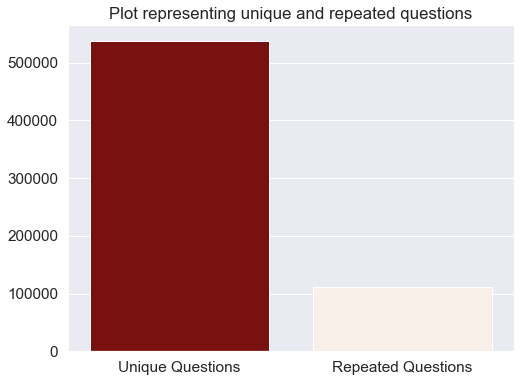

In [316]:
x = ["Unique Questions","Repeated Questions"]
y = [unique_qs,qs_morethan_onetime]
color = 'darkred', 'linen'
sns.set_palette(color)
plt.figure(figsize=(8,6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x,y)
plt.show()

In [317]:
from pandas_profiling import ProfileReport

In [318]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [319]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print(nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


(-0.5, 1439.5, 1079.5, -0.5)

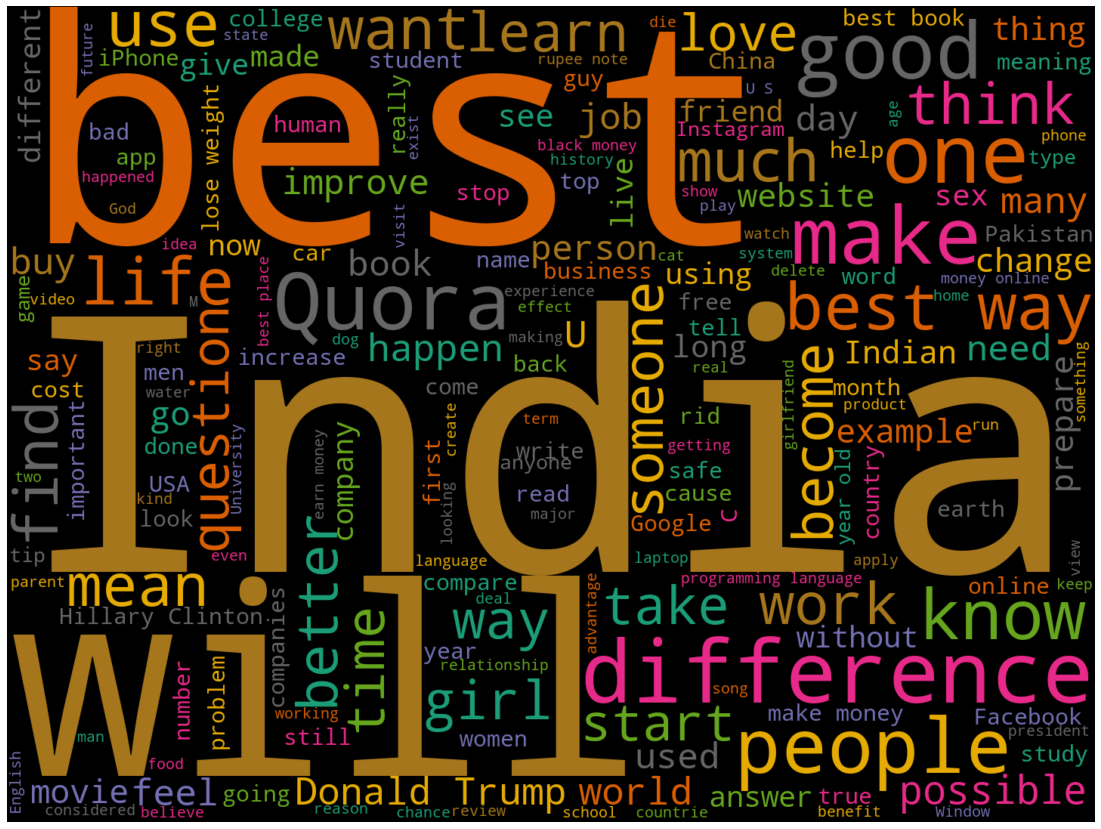

In [320]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
cloud = WordCloud(width=1440, height=1080,background_color="black").generate(" ".join(df['question1'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud.recolor(colormap='Dark2'),interpolation='bilinear')
plt.axis('off')

(-0.5, 1439.5, 1079.5, -0.5)

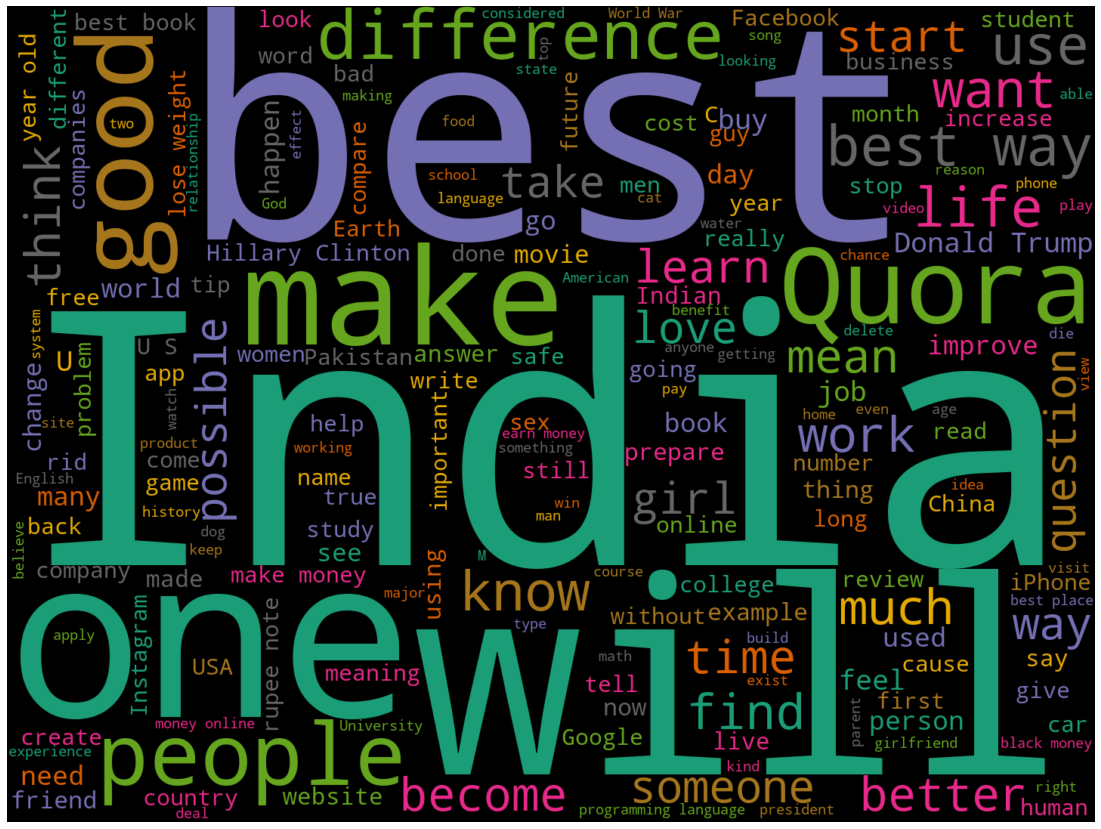

In [321]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080,background_color="black").generate(" ".join(df['question2'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud.recolor(colormap='Dark2'),interpolation='bilinear')
plt.axis('off')

<AxesSubplot:>

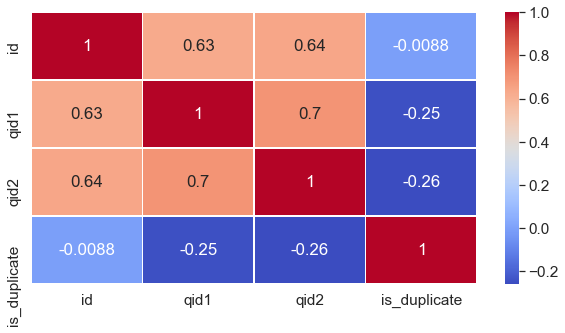

In [322]:
# not much info in the correlation map
sns.set(font_scale=1.4)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,linewidths=.5)

# Features Engineering

In [323]:
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()

In [324]:
df['combine'] = df.apply(lambda dio: dio['question1'] + "  " + dio['question2'],axis=1)
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,combine
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,What is the step by step guide to invest in sh...
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,How can I increase the speed of my internet co...
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,Why am I mentally very lonely? How can I solve...
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,"Which one dissolve in water quikly sugar, salt..."
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1,86,90,Astrology: I am a Capricorn Sun Cap moon and c...
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0,19,62,Should I buy tiago? What keeps childern activ...
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,30,41,How can I be a good geologist? What should I ...
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,31,37,When do you use シ instead of し? When do you u...
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0,60,49,Motorola (company): Can I hack my Charter Moto...


In [325]:
df=df.sample(10000,random_state=22)

In [326]:
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

In [327]:
def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1']))
    w2 = set(map(lambda word: word.lower().strip(), row['question2']))   
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))


df['word_share'] = df.apply(normalized_word_share, axis=1)


In [328]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,combine,q1_num_words,q2_num_words,word_share
225777,225777,334192,334193,How does Papua New Guinea view West Papua?,Which one is most liveable? West Papua or Papu...,0,42,60,How does Papua New Guinea view West Papua? Wh...,8,12,0.416667
353630,353630,298603,482720,What are the top 10 richest countries in the w...,Who are the poorest and wealthiest countries i...,1,51,58,What are the top 10 richest countries in the w...,10,10,0.472222
2723,2723,5407,5408,How do I clear IBPS PO in one month?,How do I prepare IBPS PO exam in one month?,1,36,43,How do I clear IBPS PO in one month? How do I...,9,10,0.457143
372514,372514,6866,83860,How do I get rid of fat?,How can I get rid of lipo from my body?,1,24,39,How do I get rid of fat? How can I get rid of...,7,10,0.393939
265607,265607,382612,382613,Should I buy used clothing off of eBay?,Should I buy used clothes on eBay?,1,39,34,Should I buy used clothing off of eBay? Shoul...,8,7,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...
88242,88242,131441,148456,How many Jews were murdered during the Holocaust?,How many Jews were killed in the Holocaust?,1,49,43,How many Jews were murdered during the Holocau...,8,8,0.475000
49891,49891,88737,88738,How do my family and I Live in tijuana for one...,What is static to static efficiency and total ...,0,53,85,How do my family and I Live in tijuana for one...,12,15,0.435897
91226,91226,152921,151212,How can I know how many device is connected to...,How can I find out how many devices are connec...,0,54,61,How can I know how many device is connected to...,12,13,0.410256
319470,319470,444889,444890,Why do people have crushes?,What do you do when you have a crush on someone?,0,27,48,Why do people have crushes? What do you do wh...,5,11,0.424242


<AxesSubplot:xlabel='word_share', ylabel='Density'>

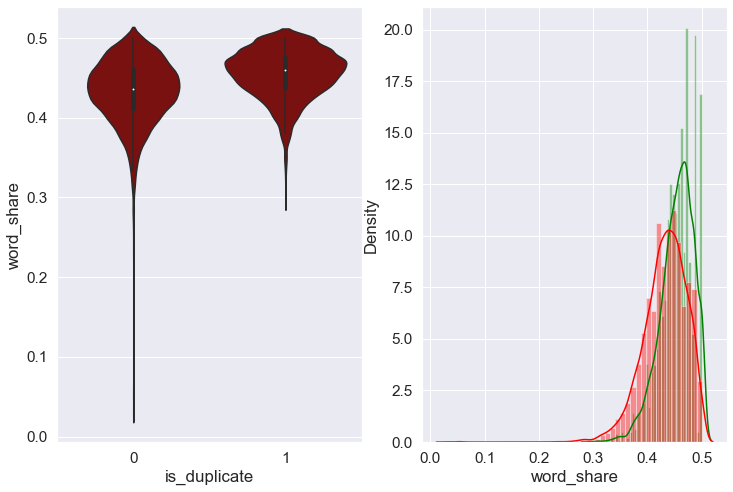

In [224]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:50000] ,color="darkred")
plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:10000], color = 'green')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:10000], color = 'red')

In [225]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate,q1len,q2len,q1_num_words,q2_num_words,word_share
365449,365449,495565,59584,What is difference between Non Resident Indian...,What are the legal and technical differences b...,0,89,157,14,26,0.454545
270589,270589,388516,388517,Did the USSR conduct high altitude surveillanc...,Should I Upgrade my Nikon D3100 DSLR OR go to ...,0,92,74,13,14,0.404762
144264,144264,34181,31460,How do you know if your girlfriend has an affair?,How do you know when your spouse is cheating?,1,49,45,10,9,0.432432
68992,68992,119116,119117,If animals could speak or if we understood the...,"What if animals could speak English, would you...",1,108,62,21,11,0.466667
255719,255719,370673,158458,How do I value a stock?,What determines the value of stocks?,1,23,36,6,6,0.444444
100014,100014,165957,165958,What is the First Amendment?,Why is the First Amendment so important?,1,28,40,5,7,0.451613
39241,39241,71160,71161,How does smoking affect my training?,How does smoking affect you?,0,36,28,6,5,0.473684
161449,161449,14111,25933,How will the ban of old 500 and 1000 rs notes ...,How are the new Indian currency notes of Rs 50...,1,83,96,18,19,0.460000
358667,358667,184328,488201,Is there any advantage for having a big butt w...,i have a really athletic body all my muscles l...,0,118,147,22,31,0.437500
40770,40770,35158,73719,Why do people call Trump racist?,Why do some people say that Donald Trump is ra...,1,32,51,6,10,0.486486


In [226]:
df.shape

(10000, 11)

In [227]:
X, y = df[df.columns[3:10]], df['is_duplicate']

In [228]:
X

,question1,question2,is_duplicate,q1len,q2len,q1_num_words,q2_num_words
365449,What is difference between Non Resident Indian...,What are the legal and technical differences b...,0,89,157,14,26
270589,Did the USSR conduct high altitude surveillanc...,Should I Upgrade my Nikon D3100 DSLR OR go to ...,0,92,74,13,14
144264,How do you know if your girlfriend has an affair?,How do you know when your spouse is cheating?,1,49,45,10,9
68992,If animals could speak or if we understood the...,"What if animals could speak English, would you...",1,108,62,21,11
255719,How do I value a stock?,What determines the value of stocks?,1,23,36,6,6
...,...,...,...,...,...,...,...
258554,Why does the WWE make shows for the military?,What does the puberty exam consist of?,0,45,38,9,7
2845,How much does Apple pay Google for showing You...,Does youtube pay Indian channels to host TV sh...,0,58,50,11,9
247969,The screen replacement for the Moto X phone co...,What is the cost of the Moto G (2nd gen) scree...,0,254,60,46,12
95304,How can I hack whatsapp?,What is the way to hack WhatsApp?,1,24,33,5,7


# Text Preprocessing

In [229]:
stop = nltk.corpus.stopwords.words('english')
#print(stop)dont 
stop.append('im')
stop.append('like')
stop.append('best')
stop.append('ever')
stop.append('im')
stop.append('dont')
stop.append('better')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [230]:
# Clean the text, with the option to remove stop_words and to stem words.
def normalized_text(text,stem_words=True):
    if pd.isnull(text):  #If null
        return ''
    # cleaning text
    text = re.sub(r"US", "America", text)
    text = re.sub(r" \w*\d\w*", "", text)
    text = re.sub(r" \d\d\d", "", text)
    text = re.sub(r" \d\d", "", text)
    text = re.sub('\w*\d',' ',text)
    text = re.sub(r" UK ", "England", text)
    text = re.sub(r" J K ", "JK", text)
    text = re.sub(r'“如果不靠欺骗自己，还能靠什么支撑自己走下去”','If you don’t rely on deceiving yourself, what else can you rely on to support yourself',text)
    text = re.sub(r'没出息','unpromising',text)
    text = re.sub(r'シ instead of し','instead of',text)
    text = re.sub(r'’|‘','',text)
    text = re.sub("\'s", "", text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r"([.,!?])", r" \1 ", text)
    # Removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    # Remove all the special characters
    text = re.sub(r'\W', ' ', text)
    #Removing Punctuations
    punctuation=string.punctuation
    text = [word for word in text if word not in punctuation]
    text = ''.join(text)
    #Removing capital letters
    text= text.lower()
    #Removing stopwords
    text = text.split()
    text = [w for w in text if not w in stop]
    text = " ".join(text)
    #lemmatize
    stemmer = WordNetLemmatizer()
    text = [stemmer.lemmatize(word) for word in text]
    text = ''.join(text)
    # Return a list of words
    return text

In [231]:
#applying text cleaning function to question text
X['question1'] = X['question1'].apply(normalized_text)
X['question2'] = X['question2'].apply(normalized_text)

In [232]:
def filter_short_words(text):
    text = text.split()
    text = [w for w in  text if len(w) > 3]
    return " ".join(text)


#applying text cleaning function to question text
X['question1'] = X['question1'].apply(filter_short_words)
X['question2'] = X['question2'].apply(filter_short_words)

In [233]:
X

,question1,question2,is_duplicate,q1len,q2len,q1_num_words,q2_num_words
365449,difference resident indian overseas citizen india,legal technical differences nonresidentindian ...,0,89,157,14,26
270589,americasr conduct high altitude surveillance m...,upgrade nikon dslr mirroless camera sony,0,92,74,13,14
144264,know girlfriend affair,know spouse cheating,1,49,45,10,9
68992,animals could speak understood language would ...,animals could speak english would still meat,1,108,62,21,11
255719,value stock,determines value stocks,1,23,36,6,6
...,...,...,...,...,...,...,...
258554,make shows military,puberty exam consist,0,45,38,9,7
2845,much apple google showing youtube,youtube indian channels host shows,0,58,50,11,9
247969,screen replacement moto phone costs current pr...,cost moto screen replacement,0,254,60,46,12
95304,hack whatsapp,hack whatsapp,1,24,33,5,7


# TFIDF


In [234]:
tfidfconverter = TfidfVectorizer(min_df=5)
tfidfconverter.fit(pd.concat([X['question1'],X['question2']]))
X_q1_tf = tfidfconverter.transform(X.question1).toarray()
X_q2_tf = tfidfconverter.transform(X.question2).toarray()
q_train_tfidf=np.hstack((X_q1_tf,X_q2_tf))

In [235]:
X

,question1,question2,is_duplicate,q1len,q2len,q1_num_words,q2_num_words
365449,difference resident indian overseas citizen india,legal technical differences nonresidentindian ...,0,89,157,14,26
270589,americasr conduct high altitude surveillance m...,upgrade nikon dslr mirroless camera sony,0,92,74,13,14
144264,know girlfriend affair,know spouse cheating,1,49,45,10,9
68992,animals could speak understood language would ...,animals could speak english would still meat,1,108,62,21,11
255719,value stock,determines value stocks,1,23,36,6,6
...,...,...,...,...,...,...,...
258554,make shows military,puberty exam consist,0,45,38,9,7
2845,much apple google showing youtube,youtube indian channels host shows,0,58,50,11,9
247969,screen replacement moto phone costs current pr...,cost moto screen replacement,0,254,60,46,12
95304,hack whatsapp,hack whatsapp,1,24,33,5,7


In [ ]:
q_train_tfidf

In [237]:
X=X[X.columns[3:9]]

# Jaccard simalrity

In [285]:
'''
def jaccard_sim(str1, str2): 
    a = set(str1.split()) 
    b = set(str2.split())
    c = a.intersection(b)
    return float(len(c))+1 / (len(a) + len(b) - len(c)+1)
    '''

'\ndef jaccard_sim(str1, str2): \n    a = set(str1.split()) \n    b = set(str2.split())\n    c = a.intersection(b)\n    return float(len(c))+1 / (len(a) + len(b) - len(c)+1)\n    '

In [ ]:
#X['jac_sim'] = [jaccard_sim(text1, text2) for text1, text2 in zip(X['question1'], X['question2'])]

# Cosine simalrity

In [286]:
'''
vectorizer_semi = TfidfVectorizer()
def cosine_sim(X_q11, X_q21):
    tfidf = vectorizer_semi.fit_transform([X_q11,X_q21 ])
    return ((tfidf * tfidf.T).A)[0,1]
    '''

'\nvectorizer_semi = TfidfVectorizer()\ndef cosine_sim(X_q11, X_q21):\n    tfidf = vectorizer_semi.fit_transform([X_q11,X_q21 ])\n    return ((tfidf * tfidf.T).A)[0,1]\n    '

In [287]:
#X['cosine_sim'] = [cosine_sim(text1, text2) for text1, text2 in zip(X['question1'], X['question2'])]

# Classification of questions by applying more than one model

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train,X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=0)

In [239]:
lr=LogisticRegression(C=5)
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_val)
print(confusion_matrix(y_val,pred_lr))
score_lr= accuracy_score(y_val,pred_lr)
print("Accuracy Score is: ", score_lr)
print("F1 Score is: ", f1_score(y_val,pred_lr))
print(classification_report(y_val, pred_lr))
print("LogisticRegression Training : {:6.2f}%".format(100*lr.score(X_train,y_train)))
print("LogisticRegression validation : {:6.2f}%".format(100*lr.score(X_val, y_val)))

[[1443   58]
 [ 876   23]]
Accuracy Score is:  0.6108333333333333
F1 Score is:  0.04693877551020408
              precision    recall  f1-score   support

           0       0.62      0.96      0.76      1501
           1       0.28      0.03      0.05       899

    accuracy                           0.61      2400
   macro avg       0.45      0.49      0.40      2400
weighted avg       0.50      0.61      0.49      2400

LogisticRegression Training :  61.89%
LogisticRegression validation :  61.08%


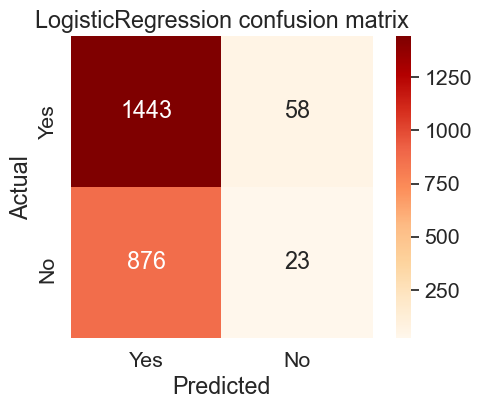

In [240]:
logs_confusion = confusion_matrix(y_val,pred_lr)
plt.figure(dpi=100)
sns.heatmap(logs_confusion, cmap=plt.cm.OrRd, annot=True, square=True,
           xticklabels=['Yes', 'No'],
           yticklabels=['Yes', 'No'], fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LogisticRegression confusion matrix');

In [241]:
k_range =[1,3,5,7,4,9,11]

param_grid_knn = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()

grid_Knn = GridSearchCV(knn, param_grid_knn, scoring='f1')

grid_Knn.fit(X_train, y_train)

pred_knn=grid_Knn.predict(X_val)
print(classification_report(y_val,pred_knn))
print("Accuracy Score is: ", score_lr)
print("F1 Score is: ", f1_score(y_val,pred_lr))
knn_confusion= confusion_matrix(y_val,pred_knn)
print("KNeighborsClassifier Training : {:6.2f}%".format(100*grid_Knn.score(X_train,y_train)))
print("KNeighborsClassifier validation : {:6.2f}%".format(100*grid_Knn.score(X_val, y_val)))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1501
           1       0.46      0.43      0.44       899

    accuracy                           0.60      2400
   macro avg       0.56      0.56      0.56      2400
weighted avg       0.59      0.60      0.59      2400

Accuracy Score is:  0.6108333333333333
F1 Score is:  0.04693877551020408
KNeighborsClassifier Training :  70.45%
KNeighborsClassifier validation :  44.10%


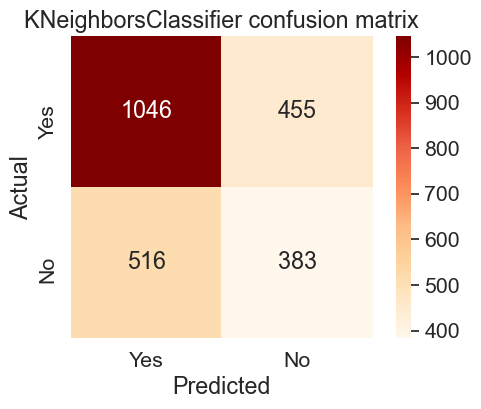

In [242]:
plt.figure(dpi=100)
sns.heatmap(knn_confusion, cmap=plt.cm.OrRd, annot=True, square=True,
           xticklabels=['Yes', 'No'],
           yticklabels=['Yes', 'No'], fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNeighborsClassifier confusion matrix');

In [243]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred_rf=rf.predict(X_val)
print(classification_report(y_val,pred_rf))
confusion_matrix(y_val,pred_rf)
print("F1 Score is: ", f1_score(y_val,pred_rf
                               ))
print("RandomForestClassifier Training : {:6.2f}%".format(100*rf.score(X_train,y_train)))
print("RandomForestClassifier validation : {:6.2f}%".format(100*rf.score(X_val, y_val)))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1501
           1       0.47      0.36      0.41       899

    accuracy                           0.61      2400
   macro avg       0.57      0.56      0.56      2400
weighted avg       0.59      0.61      0.60      2400

F1 Score is:  0.4090623033354311
RandomForestClassifier Training :  97.71%
RandomForestClassifier validation :  60.88%


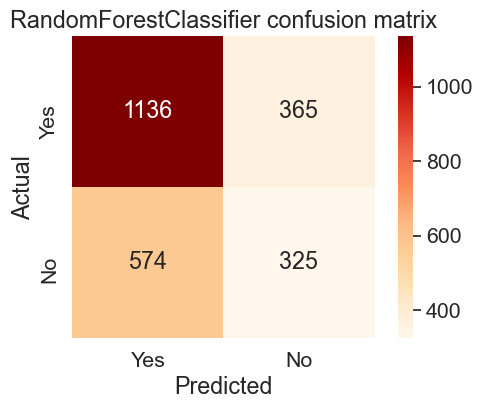

In [244]:
rf_confusion=confusion_matrix(y_val,pred_rf)
plt.figure(dpi=100)
sns.heatmap(rf_confusion, cmap=plt.cm.OrRd, annot=True, square=True,
           xticklabels=['Yes', 'No'],
           yticklabels=['Yes', 'No'], fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RandomForestClassifier confusion matrix');

In [245]:
dt=DecisionTreeClassifier(max_depth=5,max_leaf_nodes=8,random_state=1234)
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_val)
print(classification_report(y_val,pred_dt))
DecisionTreeClassifier=confusion_matrix(y_val,pred_dt)

print("F1 Score is: ", f1_score(y_val,pred_dt))
print("DecisionTreeClassifier Training : {:6.2f}%".format(100*dt.score(X_train,y_train)))
print("DecisionTreeClassifier validation : {:6.2f}%".format(100*dt.score(X_val, y_val)))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1501
           1       0.00      0.00      0.00       899

    accuracy                           0.63      2400
   macro avg       0.31      0.50      0.38      2400
weighted avg       0.39      0.63      0.48      2400

F1 Score is:  0.0
DecisionTreeClassifier Training :  62.93%
DecisionTreeClassifier validation :  62.54%


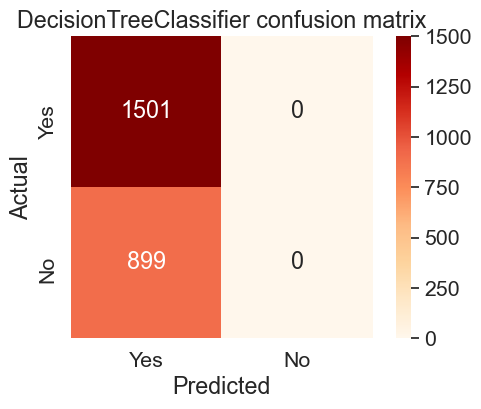

In [248]:

plt.figure(dpi=100)
sns.heatmap(DecisionTreeClassifier, cmap=plt.cm.OrRd, annot=True, square=True,
           xticklabels=['Yes', 'No'],
           yticklabels=['Yes', 'No'], fmt = 'd')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('DecisionTreeClassifier confusion matrix');

# Topic Modeling with Latent Semantic Analysis (LSA)

In [249]:
# Acronynms: Latent Semantic Analysis (LSA) is just another name for 
# Signular Value Decomposition (SVD) applied to Natural Language Processing (NLP)
lsa = TruncatedSVD(4)
doc_topic = lsa.fit_transform(X_q1_tf)
lsa.explained_variance_ratio_

array([0.00570212, 0.00519903, 0.00517496, 0.0046202 ])

In [250]:
topic_word = pd.DataFrame(lsa.components_.round(2),
             index = ["component_1","component_2","component_3","component_4"],
             columns = tfidfconverter.get_feature_names())
topic_word

,aadhaar,ability,able,abolishing,abroad,abuse,abusive,academic,academy,accenture,...,yoda,yoga,york,young,younger,youre,youtube,youve,zero,zone
component_1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.01,0.0,0.0,0.0
component_2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.02,0.0,0.0,0.0
component_3,-0.0,-0.0,0.00,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.01,0.0,0.0,0.01,-0.02,0.0,0.0,-0.0
component_4,-0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,-0.00,0.0,0.0,0.0


In [251]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [252]:
display_topics(lsa, tfidfconverter.get_feature_names(), 5)


Topic  0
difference, make, money, people, india

Topic  1
make, money, quora, people, online

Topic  2
people, quora, questions, many, think

Topic  3
india, life, think, would, good


In [255]:
Vt = pd.DataFrame(doc_topic.round(5),
             columns = ["component_1","component_2","component_3","component_4" ])
Vt

,component_1,component_2,component_3,component_4
0,0.44548,-0.09937,0.02149,0.27425
1,0.00531,0.01021,0.00719,0.01918
2,0.01615,0.04423,0.04509,0.01590
3,0.02699,0.05470,0.03501,0.04939
4,0.01017,0.00755,-0.00046,0.01271
...,...,...,...,...
9995,0.10412,0.19375,-0.17476,-0.06784
9996,0.03075,0.06429,0.02450,-0.00012
9997,0.00903,0.01469,0.00072,0.01781
9998,0.00711,0.01572,0.00251,0.00321


# Topic Modeling with NMF

In [256]:
# function to display topics with words



def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
#         else:
#             print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
    

def display_top(model, feature_names, no_top_words, topic_names=None):
    
    my_dict = {'topic_0':'','topic_1':'','topic_2':'','topic_3':'','topic_4':''}
    ctr = 0
    for ix, topic in enumerate(model.components_):
                #if not topic_names or not topic_names[ix]:
#             print("\nTopic ", ix)
        txt = ",".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
        my_dict['topic_'+str(ctr)] = txt
        ctr+=1
#         print('words are::: ',txt)
    return my_dict

In [257]:
topic_nums = list(np.arange(3, 10, 1))

#nmf_models = []
for num in topic_nums:
    nmf = NMF(num)
    #nmf_models.append(nmf)
    nmf.fit_transform(X_q1_tf)
    display_topics(nmf, tfidfconverter.get_feature_names(),5)
    print("------------------------------------------")


Topic  0
difference, love, computer, india, civil

Topic  1
make, money, online, earn, black

Topic  2
people, quora, questions, india, many
------------------------------------------

Topic  0
difference, love, computer, civil, trip

Topic  1
make, money, online, earn, black

Topic  2
quora, people, questions, many, question

Topic  3
india, life, would, trump, become
------------------------------------------

Topic  0
difference, love, computer, civil, trip

Topic  1
make, money, online, earn, black

Topic  2
quora, people, questions, many, question

Topic  3
india, pakistan, trump, become, think

Topic  4
life, good, would, learn, time
------------------------------------------

Topic  0
difference, love, computer, civil, trip

Topic  1
make, money, online, earn, black

Topic  2
quora, people, questions, many, question

Topic  3
india, trump, pakistan, become, donald

Topic  4
good, learn, books, language, programming

Topic  5
life, would, thing, live, feel
----------------------

In [258]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(X_q1_tf)

In [259]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns =  tfidfconverter.get_feature_names())
topic_word

,aadhaar,ability,able,abolishing,abroad,abuse,abusive,academic,academy,accenture,...,yoda,yoga,york,young,younger,youre,youtube,youve,zero,zone
component_1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_2,0.002,0.003,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.089,0.001,0.000,0.007
component_3,0.001,0.000,0.007,0.000,0.001,0.001,0.002,0.000,0.000,0.000,...,0.000,0.000,0.012,0.007,0.000,0.014,0.003,0.004,0.000,0.000
component_4,0.000,0.002,0.016,0.001,0.013,0.000,0.002,0.011,0.013,0.007,...,0.001,0.012,0.008,0.005,0.009,0.004,0.002,0.009,0.002,0.008


In [260]:
display_topics(nmf_model, tfidfconverter.get_feature_names(), 5)


Topic  0
difference, love, computer, civil, trip

Topic  1
make, money, online, earn, black

Topic  2
quora, people, questions, many, question

Topic  3
india, life, would, trump, become


# Topic Modeling with LDA

In [261]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 8

lda = LatentDirichletAllocation(n_components=n_components, max_iter=10,
                                learning_method = 'batch',
                                n_jobs=-1,verbose=1)
lda.fit(topic_word)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10


LatentDirichletAllocation(n_components=8, n_jobs=-1, verbose=1)

In [262]:
n_top_words = 10
topic_word =tfidfconverter.get_feature_names()
display_topics(lda,topic_word, n_top_words)


Topic  0
becomes, effects, primary, citizen, main, electrical, debate, procedure, terms, shall

Topic  1
becomes, effects, primary, citizen, main, electrical, debate, procedure, terms, shall

Topic  2
becomes, effects, primary, citizen, main, electrical, debate, procedure, terms, shall

Topic  3
becomes, effects, primary, citizen, main, electrical, debate, procedure, terms, shall

Topic  4
india, life, would, trump, become, think, good, donald, pakistan, notes

Topic  5
becomes, effects, primary, citizen, main, electrical, debate, procedure, terms, shall

Topic  6
becomes, effects, primary, citizen, main, electrical, debate, procedure, terms, shall

Topic  7
difference, make, money, quora, people, online, questions, earn, many, question


In [263]:
Duplicate_Questions = df.loc[(df.is_duplicate == 1)]
len(Duplicate_Questions)

3717

In [264]:
Q1_D = pd.DataFrame(Duplicate_Questions)
Q1_Duplicate = Q1_D.question1
len(Q1_Duplicate)

3717

# K-means Clustering

In [265]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
#vect = CountVectorizer(analyzer='word')
vectorizer = TfidfVectorizer(min_df=3, max_features = 10000)

In [266]:
tfid = vectorizer.fit_transform(Q1_Duplicate)
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
len(tfidf)

1444

In [267]:
from sklearn.cluster import MiniBatchKMeans

num_clusters = 6
kmeans_model = MiniBatchKMeans(n_clusters=num_clusters, init='k-means++', n_init=1, 
                         init_size=1000, batch_size=1000, verbose=False, max_iter=1000)
kmeans = kmeans_model.fit(tfid)
kmeans_clusters = kmeans.predict(tfid)
kmeans_distances = kmeans.transform(tfid)

In [268]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=50, random_state=0)
svd_tfidf = svd.fit_transform(tfid[:10000])

In [269]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_tfidf = tsne_model.fit_transform(svd_tfidf)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3717 samples in 0.000s...
[t-SNE] Computed neighbors for 3717 samples in 0.420s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3717
[t-SNE] Computed conditional probabilities for sample 2000 / 3717
[t-SNE] Computed conditional probabilities for sample 3000 / 3717
[t-SNE] Computed conditional probabilities for sample 3717 / 3717
[t-SNE] Mean sigma: 0.169743
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.239700
[t-SNE] KL divergence after 1000 iterations: 1.357974


In [270]:
tsne_kmeans = tsne_model.fit_transform(kmeans_distances[:1000])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.005s...
[t-SNE] Computed neighbors for 1000 samples in 0.038s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.014398
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.326080
[t-SNE] KL divergence after 1000 iterations: 0.594000


In [271]:
sorted_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(num_clusters):
    print("Cluster %d:" % i, end='')
    for j in sorted_centroids[i, :10]:
        print(' %s' % terms[j], end='')
    print()

Cluster 0: you do what your ever the have how think is
Cluster 1: the in which what why best is does india will
Cluster 2: is what the to best of way and it your
Cluster 3: can how my and money in 500 1000 notes where
Cluster 4: are what some the of best to people ways that
Cluster 5: do how my get to should you why on what


# PCA

In [273]:
from sklearn.decomposition import PCA

In [274]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=4)
pca.fit(X_train)
pcafeatures_train = pca.transform(X_train)

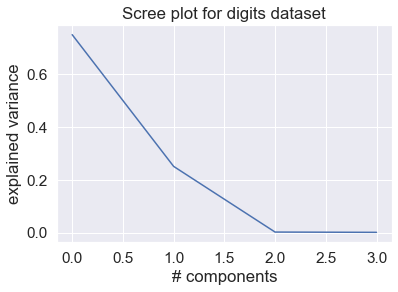

In [275]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

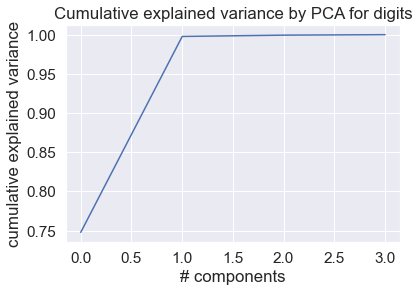

In [276]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');